In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [2]:
path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/UV_vis/"

fig_folder = path + "Figures/"
if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)

data = pd.read_csv(path + "JTS_filters" + ".csv")
wavelengths = data.iloc[1:,0].values.astype(float)
data.keys()
filter_names = ["good fluo filter", 'bad fluo filter', 'squared fluo filter', 'red filter 632','millenium LP 600nm', 'BG39 filter', 'P700 filter', 'BG695 filter']
dict_filters = {"wavelengths": wavelengths}
for i, name in enumerate(filter_names):
    index = data.keys().tolist().index(name)
    dict_filters[name] = data.iloc[1:,index+1].values.astype(float)
filters = pd.DataFrame(dict_filters)
new_filter_names = ["wavelengths", "good fluo filter", 'bad fluo filter', 'square filter', 'BP filter 632 nm','LP filter 600nm', 'BG39 filter', 'P700 filter', 'BG695 filter']
filters.columns = new_filter_names
filters

,wavelengths,good fluo filter,bad fluo filter,square filter,BP filter 632 nm,LP filter 600nm,BG39 filter,P700 filter,BG695 filter
0,800.014343,69.047508,82.096901,92.678070,-0.013774,-0.041818,-0.061173,82.522873,81.511047
1,799.005920,68.809471,81.557068,92.493950,-0.005762,-0.002871,0.050708,82.440384,81.519791
2,797.997131,68.856895,82.029823,92.620430,-0.054776,-0.082113,0.005569,82.425591,81.479362
3,796.987915,69.031975,81.497498,92.652908,0.081147,-0.110525,0.052100,82.557121,81.629395
4,796.013123,68.834488,81.455643,92.279640,0.008593,-0.057464,0.049883,82.275276,81.381592
...,...,...,...,...,...,...,...,...,...
396,404.013519,0.011839,0.011359,0.020651,0.019486,82.824379,21.739351,0.008497,-0.015877
397,403.007904,0.003180,0.023169,0.012742,0.000000,84.116585,21.655117,0.018175,0.016508
398,402.002106,0.027064,0.029211,0.016555,0.021795,86.111481,21.038477,0.016252,0.009486
399,400.996185,-0.006330,0.000000,0.010491,-0.006581,85.193314,20.707109,0.013422,0.019235


In [3]:
data

,Baseline 100%T,Unnamed: 1,Baseline 100%T.1,Unnamed: 3,sample1,Unnamed: 5,good fluo filter,Unnamed: 7,good fluo filter reverse,Unnamed: 9,...,Unnamed: 17,millenium LP 600nm1,Unnamed: 19,BG39 filter,Unnamed: 21,P700 filter,Unnamed: 23,BG695 filter,Unnamed: 25,Unnamed: 26
0,Wavelength (nm),%T,Wavelength (nm),%T,Wavelength (nm),%T,Wavelength (nm),%T,Wavelength (nm),%T,...,%T,Wavelength (nm),%T,Wavelength (nm),%T,Wavelength (nm),%T,Wavelength (nm),%T,NaN
1,800.0143433,97.77190399,800.0143433,97.5279007,800.0143433,100.3318939,800.0143433,69.04750824,800.0143433,69.41879272,...,-0.04181792215,800.0143433,0.05564376339,800.0143433,-0.06117328256,800.0143433,82.52287292,800.0143433,81.51104736,NaN
2,799.0059204,97.83018494,799.0059204,97.73958588,799.0059204,99.96154785,799.0059204,68.80947113,799.0059204,69.29595947,...,-0.002871048637,799.0059204,0.04081778228,799.0059204,0.05070842057,799.0059204,82.44038391,799.0059204,81.51979065,NaN
3,797.9971313,97.64906311,797.9971313,97.60617065,797.9971313,100.3093719,797.9971313,68.85689545,797.9971313,69.32428741,...,-0.08211312443,797.9971313,0.0405902639,797.9971313,0.005568829365,797.9971313,82.42559052,797.9971313,81.47936249,NaN
4,796.987915,97.77056885,796.987915,97.63401031,796.987915,100.0319824,796.987915,69.03197479,796.987915,69.38889313,...,-0.1105247885,796.987915,-0.02212704346,796.987915,0.05210026354,796.987915,82.55712128,796.987915,81.62939453,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,404.0135193,95.98057556,404.0135193,95.97743988,404.0135193,99.93875885,404.0135193,0.01183923054,404.0135193,0.01547469851,...,82.82437897,404.0135193,82.83130646,404.0135193,21.73935127,404.0135193,0.008497076109,404.0135193,-0.01587698795,NaN
398,403.0079041,96.05814362,403.0079041,95.94049072,403.0079041,100.1223297,403.0079041,0.003180497792,403.0079041,0.02137701586,...,84.11658478,403.0079041,83.77615356,403.0079041,21.65511703,403.0079041,0.01817511953,403.0079041,0.01650848612,NaN
399,402.0021057,96.09978485,402.0021057,96.09959412,402.0021057,100.0167236,402.0021057,0.02706426382,402.0021057,0.01600066386,...,86.11148071,402.0021057,85.94235229,402.0021057,21.03847694,402.0021057,0.01625155658,402.0021057,0.009486330673,NaN
400,400.9961853,96.02020264,400.9961853,96.12766266,400.9961853,99.90200806,400.9961853,-0.006329874974,400.9961853,0.009801972657,...,85.1933136,400.9961853,85.19329071,400.9961853,20.70710945,400.9961853,0.01342171151,400.9961853,0.01923482306,NaN


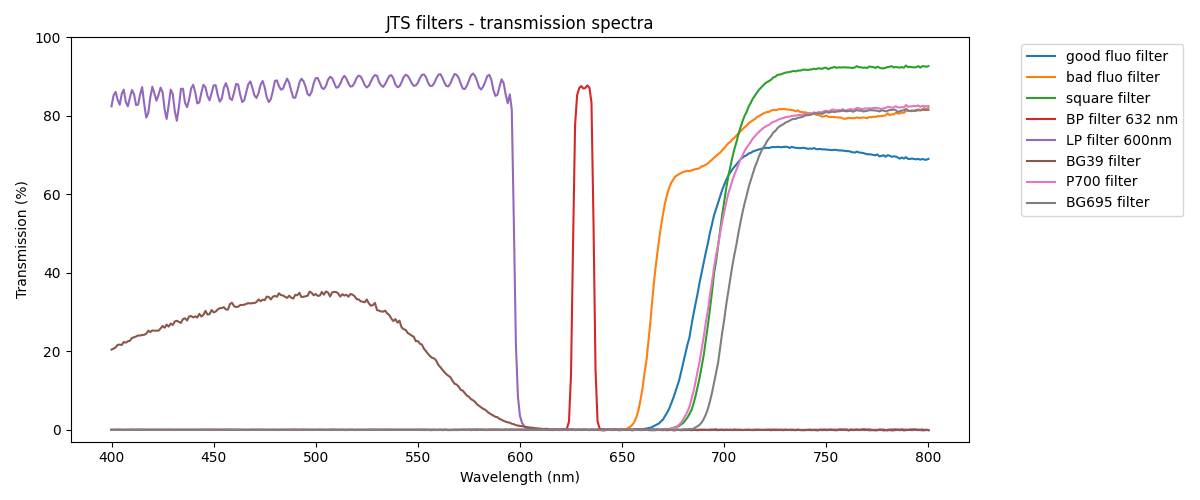

In [4]:
fig, ax = plt.subplots(figsize=(12, 5))

for i in filters.keys()[1:]:
    ax.plot(wavelengths, filters[i], label=i)
ax.set_title("JTS filters - transmission spectra") 
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Transmission (%)")
ax.set_ylim(-3, 100)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
fig.savefig(fig_folder + "JTS_filters.png", dpi = 300)